# Pràctica 1: Resolem un problema de classificació

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre processament de dades, classificació i validacio creuada.
  
* Ser capaç de comparar diferents models de classificació.

* Ser capac de fer cerca d'hiperparàmetres.

* Entendre i implementar la validació creuada.

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta pràctica és prèvia al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera pràctica les preguntes estan definides, però us ha de servir d'aprenentatge a l'hora de saber com estructurar un projecte d'aprenentatge automàtic ja que en el cas kaggle no tindreu les preguntes.

## Base de dades

En aquesta pràctica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si cada passatger va sobreviure o no.


https://www.kaggle.com/c/titanic/data


## Treball en grup
Aquesta pràctica es treballarà en grups de 2-3 persones. En casos excepcionals i degudament justificats la pràctica es podrà realitzar de forma individual.

## Seguiment i entrega de la pràctica

En la pràctica 1 es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació en una mateixa base de dades.

En aquesta pràctica es realitzaran sessions de seguiment del treball. Aquestes sessions de treball estan orientades a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. És molt recomanable venir a classe amb el treball fet per tal de poder comentar dubtes.

Pel que fa l'entrega, caldrà entregar per caronte el següent:

1. Memòria en format PDF explicant els resultats trobats sobre la bases de dades. La memòria ha d'utilitzar la plantilla de LaTeX que podeu trobar al Caronte i ha de ser de com a màxim 3 pàgines.
   
2. Notebook amb el respectiu codi de python.

3. (Opcional) Presentació amb els resultats 4 min màxim.

# Descripció de la pràctica

A continuació es mostren tots els continguts que s'evaluaran en la pràctica:

1. EDA (exploratory data analysis) (1 punt):
  * Anàlisi de tamany i tipologia de dades
  * Primera valoració de correlacions
  * Anàlisi atribut target
2. Preprocessing (2 punts):
  * Eliminació de nans
  * Encoding de categòriques
  * Altres (PCA, normalització, ...)
3. Metric selection (1.5 punts):
  * Selecció de la millor mètrica pel problema
  * Visualització de ROC/AUC per model base
4. Model Selection amb Crossvalidation (4 punts):
  * Selecció del millor model
  * Cerca d'hiperparàmetres
5. Anàlisi final (1.5 punt)

La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relació amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat. És recomanable llegir totes les preguntes abans de realitzar la pràctica i tenir-les en ment a l'hora d'executar-la.


**IMPORTANT**: El que es valorarà en la pràctica és la capacitat de mantenir una narrativa coherent alhora que s'expliquen els resultats. No es mirarà tant que alguna pregunta quedi per respondre sinó que els passos seguits en base als resultats obtinguts siguin coherents.

In [16]:
import pandas
import sklearn
import sklearn.linear_model

df=pandas.read_csv("./train.csv")

### 1. EDA (exploratory data analysis) (1 punt)

Abans de res cal sempre veure com es la base de dades assignada.

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs teniu? (Númerics, temporals, categòrics, binaris...)
* Com es el target? quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creieu que pot afectar a la classificació la seva distribució?

12
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
int64
[0 1]
Survived
0    549
1    342
Name: count, dtype: int64
Nombre de valors NaN per columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Correlació entre variables numèriques:
Survived       1.000000
Name           0.332350
Fare           0.257307
EmbarkedC      0.168240
Parch          0.081629
EmbarkedQ      0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
EmbarkedS     -0.155660
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


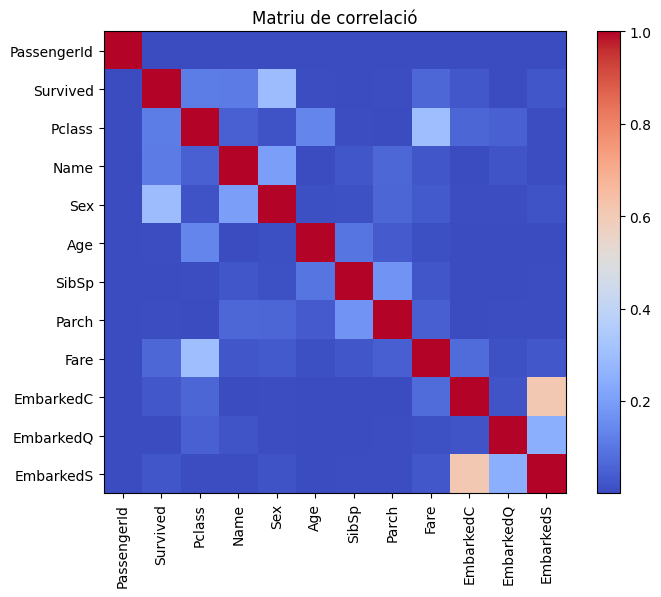

       PassengerId    Survived      Pclass         Age       SibSp  \
count   168.000000  168.000000  168.000000  130.000000  168.000000   
mean    445.357143    0.553571    1.886905   30.814769    0.386905   
std     259.454201    0.498608    0.944100   15.434860    0.557213   
min       2.000000    0.000000    1.000000    0.420000    0.000000   
25%     235.500000    0.000000    1.000000   21.250000    0.000000   
50%     455.000000    1.000000    1.000000   29.000000    0.000000   
75%     651.000000    1.000000    3.000000   40.000000    1.000000   
max     890.000000    1.000000    3.000000   71.000000    2.000000   

            Parch        Fare  
count  168.000000  168.000000  
mean     0.363095   59.954144  
std      0.660481   83.912994  
min      0.000000    4.012500  
25%      0.000000   13.697950  
50%      0.000000   29.700000  
75%      1.000000   78.500025  
max      3.000000  512.329200  


In [ ]:
print(len(df.columns))
print(df.dtypes)
print(df["Survived"].dtype)
print(df["Survived"].unique())
print(df["Survived"].value_counts())
print("Nombre de valors NaN per columna:")
print(df.isna().sum())
import matplotlib.pyplot as plt

# Considerem "Survived" com a y i la resta d'atributs com a X (menys el PassengerId si no aporta informació)
interesting = df.drop(columns=["Ticket", "Cabin"]) # no pasar
interesting["Name"] = interesting["Name"].str.len() # no pasar
interesting["Sex"] = (interesting["Sex"] == "male").astype(int) # si
interesting["EmbarkedC"] = interesting["Embarked"] == "C" # no passar
interesting["EmbarkedQ"] = interesting["Embarked"] == "Q" # no passar
interesting["EmbarkedS"] = interesting["Embarked"] == "S" # no passar
interesting = interesting.drop(columns=["Embarked"]) # no passar
interesting["Pclass"] = interesting["Pclass"].astype(int) # si 
corrs = interesting.corr()
print("Correlació entre variables numèriques:")
print(corrs["Survived"].sort_values(ascending=False))

# Visualització matriu de correlació de totes les numèriques
plt.figure(figsize=(8,6))
plt.title("Matriu de correlació")
plt.imshow(corrs**2, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90)
plt.yticks(range(len(corrs.columns)), corrs.columns)
plt.show()

print(df[df["Embarked"]=="C"].describe())

### 2. Preprocessing (normalitzation, outlier removal, feature selection, ...) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estan les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització serà més adient per a les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant l'aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categòriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categòriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tècnica de selecció de variables? Ho trobeu necessari?

In [ ]:
# Preprocessament: estandardització, Sex binari, Embarked dummies, NaN -> -1
from sklearn.preprocessing import StandardScaler

# Còpia de les dades originals
X = df.copy()

# Eliminar columnes no utilitzades
X = X.drop(columns=["Ticket", "Cabin"])  # sense informació útil

# Longitud del nom i eliminar el text original
X["NameLenght"] = X["Name"].str.len().astype("int64")
X = X.drop(columns=["Name"])  # ja no cal

# Sex binari amb NaN -> -1
X["Sex"] = X["Sex"].map({"male": 1, "female": 0}).fillna(-1).astype("int64")

# Embarked com has indicat (C, Q, S). Si és NaN -> -1 a totes tres
X["EmbarkedC"] = X["Embarked"] == "C"
X["EmbarkedQ"] = X["Embarked"] == "Q"
X["EmbarkedS"] = X["Embarked"] == "S"
emb_na_mask = X["Embarked"].isna()
X[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = (
    X[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]].astype("int64")
)
X.loc[emb_na_mask, ["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = -1
X = X.drop(columns=["Embarked"])  # ja codificat

# Assegurar tipus de Pclass
X["Pclass"] = X["Pclass"].astype("int64")

# Columnes numèriques a estandarditzar
numeric_cols = ["Pclass", "NameLenght", "Age", "SibSp", "Parch", "Fare"]

# NaN -> -1 a numèriques
X[numeric_cols] = X[numeric_cols].astype("float64").fillna(-1)

# Estandarditzar numèriques
scaler = StandardScaler()
X_scaled_numeric = pandas.DataFrame(
    scaler.fit_transform(X[numeric_cols]),
    columns=numeric_cols,
    index=X.index,
)

# Columnes categòriques/indicadors a mantenir
other_cols = ["Sex", "EmbarkedC", "EmbarkedQ", "EmbarkedS"]

# Conjunt final de característiques
X_preprocessed = pandas.concat(
    [X_scaled_numeric, X[other_cols].astype("int64")], axis=1
)

# Target
y = df["Survived"].astype("int64")

# Per comoditat, fem servir X com el conjunt preprocessat
X = X_preprocessed

,Pclass,NameLenght,Age,SibSp,Parch,Fare,Sex,EmbarkedC,EmbarkedQ,EmbarkedS
0,0.827377,-0.427451,-0.089634,0.432793,-0.473674,-0.502445,1,0,0,1
1,-1.566107,2.590962,0.806350,0.432793,-0.473674,0.786845,0,1,0,0
2,0.827377,-0.535252,0.134362,-0.474545,-0.473674,-0.488854,0,0,0,1
3,-1.566107,1.836359,0.638353,0.432793,-0.473674,0.420730,0,0,0,1
4,0.827377,-0.319651,0.638353,-0.474545,-0.473674,-0.486337,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.643052,0.190361,-0.474545,-0.473674,-0.386671,1,0,0,1
887,-1.566107,0.111551,-0.257631,-0.474545,-0.473674,-0.044381,0,0,0,1
888,0.827377,1.405157,-1.377611,0.432793,2.008933,-0.176263,0,0,0,1
889,-1.566107,-0.643052,0.134362,-0.474545,-0.473674,-0.044381,1,1,0,0


### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats. Aquestes funcions ens serviran més endavant. Caldrà tambe triar la mètrica que farem servir després per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de començar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset?
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina mètrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

**Nota**: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'únic que es valora és l'elecció de la mètrica de classificació així com saber quin tipus de gràfiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la mètrica d'error que es farà servir, i és una decisió que cal pendre de forma prèvia a entrenar models.

### 4. Model Selection amb validació creuada (4 punts)

Fent servir la mètrica trobada en l'apartat anterior, en aquest apartat caldrà seleccionar una sèrie de models i, fent ús de la validació creuada, seleccionar el millor model amb els seus respectius millors hyperpàrametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de diverses tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist tècniques com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i també coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Per aquest apartat es demana seleccionar **un minim de 3 models**.

**Preguntes:**
* Quins models heu considerat? Per què els heu seleccionat?
* Fent servir validació creuada, escolliu el millor model (agafant els hiperparàmetres per defecte). Recordeu fer servir la mètrica utilitzada en l'apartat anterior i fer fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html).

* Seleccioneu una sèrie d'hiperparàmetres a provar per cadascun dels models i realitzeu una cerca d'hiperparàmetres. Hi ha algun model que creieu que podeu descartar de primeres? Per què?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de validació heu escollit en la selecció de models?

* Quines formes de buscar els millors hiperparàmetres heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html). Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora), quin dels mètodes creieu que obtindrà millor resultat final?

* Opcional: Feu la prova, i amb el model i el metode de validació creuada escollit, configureu els diferents mètodes de cerca per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i així trobeu el número de intents que podeu fer en cada cas.)

### 5.Anàlisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparàmetres, caldrà fer un anàlisi final amb els resultats obtinguts.

**Preguntes:**
* Mostreu les corves ROC/PR (la que hagueu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents mètriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Això és el que es coneix com un cas d'ús.

* Com creieu que es podria millorar el vostre model?